
# Name: Yassa Fareed
# The Sparks Foundation (Data Science & Business Analytics)
# Task6 - Prediction using Decision Tree Algorithm


## Import libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset


In [2]:
# loading the data into pandas dataframe
df=pd.read_csv(r'Iris.csv') 

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#making the Id as index 
df.index = df['Id']

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,,
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#dropping the Id present in column as it is not needed now
df.drop(['Id'],axis=1,inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#encoding the species categories to 0 1 2 
df['Species_encoded'] = df['Species'].astype('category').cat.codes
x=df.iloc[:,:4] # seperate features 
y= df['Species_encoded'] # contains the encoded species name 

In [9]:
y.unique()

array([0, 1, 2], dtype=int8)

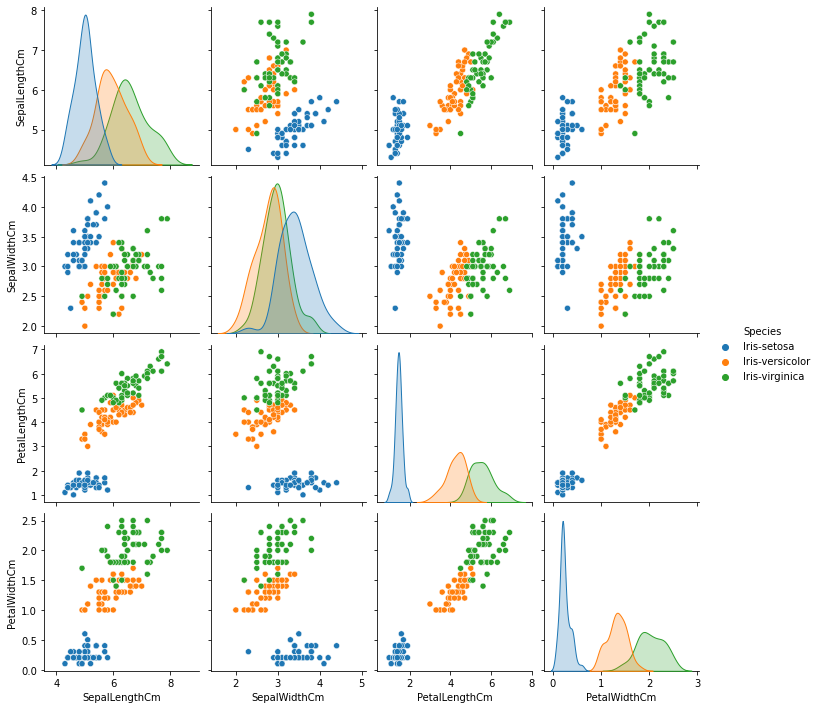

In [10]:
#to visualize each feature with another using scatter plot based on targeted variable 'species'
to_visualize=df.iloc[:,:5]
sns.pairplot(to_visualize,hue='Species')

## Dividing the data into train and test

In [11]:
# 80% train 20% test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

## Fitting the model

In [12]:
#applying decision tree classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
features = x.columns.tolist()

In [14]:
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

## Checking Accuracy

In [15]:
predictions = dt.predict(x_test)

In [16]:
#to check accuracy the predictions are compared with true result
accuracy_score(predictions,y_test)

1.0

In [17]:
 #confusion matrix to determine true positive, true negative, false positive, false negative
confusion_matrix(y_test, predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Visualizing the decision tree 

In [18]:
targetnames = df['Species'].unique().tolist()
targetnames

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

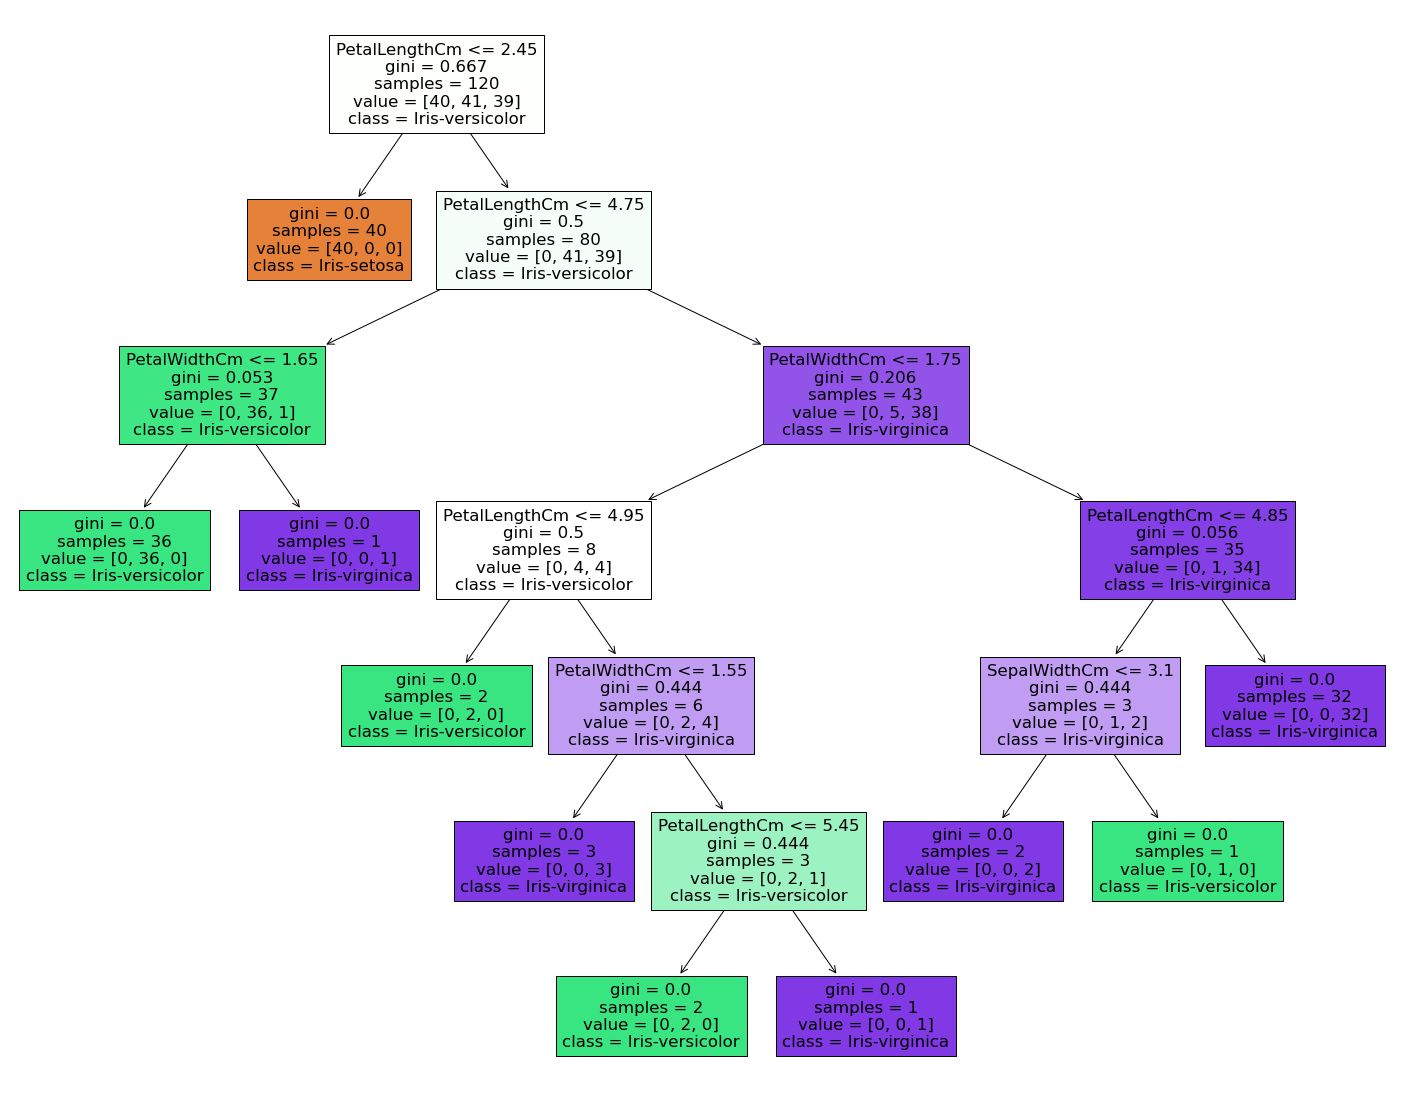

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=features,  
                   class_names=targetnames,
                   filled=True)

=> The gini gain is calculated for each feature on each level
<br>=> The highest gini is the one having the most information.  
=> The highest gini gain split is taken as root node to decide further about the prediction